# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

In [43]:
# a teď už je to na vás 💪
# níže vložte své řešení

# ✨ Dataset

In [44]:
# import required libs
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## Data from D.csv

In [45]:
# read data
my_data = pd.read_csv("d.csv")

In [46]:
# basic info
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


In [47]:
my_data.head()

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,4:53:00,4:54:30,2,0,1,1,1,1,1,0,0
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,4:54:30,4:56:00,2,0,1,1,1,1,1,0,0
2,U4610Z301,Záluží,U4609Z301,Dobříň,4:56:00,4:59:00,2,0,1,1,1,1,1,0,0
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,4:59:00,5:03:00,2,0,1,1,1,1,1,0,0
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,4:36:00,4:38:00,2,0,1,1,1,1,1,0,0


## Stops

In [48]:
stops_data = pd.read_csv ("stops.txt", sep=",")

In [49]:
stops_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16435 entries, 0 to 16434
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              16435 non-null  object 
 1   stop_name            15936 non-null  object 
 2   stop_lat             16435 non-null  float64
 3   stop_lon             16435 non-null  float64
 4   zone_id              15408 non-null  object 
 5   stop_url             0 non-null      float64
 6   location_type        16435 non-null  int64  
 7   parent_station       954 non-null    object 
 8   wheelchair_boarding  16435 non-null  int64  
 9   level_id             954 non-null    object 
 10  platform_code        14750 non-null  object 
 11  asw_node_id          15748 non-null  float64
 12  asw_stop_id          15354 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.6+ MB


In [50]:
stops_data.head()

,stop_id,stop_name,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,level_id,platform_code,asw_node_id,asw_stop_id
0,U50S1,Budějovická,50.044411,14.448787,P,NaN,1,NaN,1,NaN,NaN,50.0,NaN
1,U52S1,Chodov,50.031672,14.490961,P,NaN,1,NaN,1,NaN,NaN,52.0,NaN
2,U75S1,Kolbenova,50.110395,14.516398,P,NaN,1,NaN,1,NaN,NaN,75.0,NaN
3,U78S1,Ládví,50.126591,14.469451,P,NaN,1,NaN,1,NaN,NaN,78.0,NaN
4,U100S1,Vltavská,50.100298,14.438492,P,NaN,1,NaN,1,NaN,NaN,100.0,NaN


> Some lines are missing the name of the stop, I can't do anything with these values, so I'll delete them.

In [51]:
# delete lines where stop_name is NaN
clean_stops = stops_data.dropna(subset=['stop_name'])

In [52]:
# creating a dictionary with coordinates of stops
stops_positions = clean_stops.groupby('stop_name').agg({
    'stop_lon': 'mean',  # mean longitude for stations with the same name
    'stop_lat': 'mean'   # mean latitude for stations with the same name
}).apply(lambda row: np.array([row['stop_lon'], row['stop_lat']]), axis=1).to_dict()

> I chose the average coordinate value of the position of stations with the same names for several reasons:
> 1. Instead of several stations, we process one station, which makes our work easier.
> 2. Stations with the same name but serving different modes of transport are located close to each other. The average value will roughly represent the position of all stations.
> 3. In our task, high geographical accuracy and small differences in station locations are not important. We analyse the interaction between stations

# ⚙️ Předzpracování dat

In [53]:
def correct_time_extended(time_str):
    '''function for time correction'''
    
    # split the time
    hours, minutes, seconds = map(int, time_str.split(':'))
    # applying the modulo 24
    corrected_hours = hours % 24
    # forming a new time values
    corrected_time_str = f"{corrected_hours:02}:{minutes:02}:{seconds:02}"
    return corrected_time_str

In [54]:
# apllying function 
my_data['depart_from'] = my_data['depart_from'].apply(correct_time_extended)
my_data['arrive_to'] = my_data['arrive_to'].apply(correct_time_extended)

In [55]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


# 🕸️ Základní síťová analýza

In [56]:
import networkx as nx

> I choose the networkX library and will represent everything with a graph

## Creating a graph 

In [57]:
my_data["route_type"].unique()

array([2, 3, 0, 4, 7, 1])

In [58]:
route_type_mapping = {
    0: 'Tram',
    1: 'Subway',
    2: 'Rail',
    3: 'Bus',
    4: 'Ferry',
    7: 'Funicular'
}
# i have found the info in the documentation

In [59]:
# counting the number of rides between each pair of stops per week
rides_count = my_data.groupby(['stop_from_name', 'stop_to_name', 'route_type']).size().reset_index(name='weight')

In [60]:
# route_types for each pair
route_types = my_data[['stop_from_name', 'stop_to_name', 'route_type']].drop_duplicates()

In [61]:
# merge infos
full_info = pd.merge(rides_count, route_types, on=['stop_from_name', 'stop_to_name', 'route_type'])

In [62]:
full_info.shape

(18719, 4)

In [63]:
# adding edges to a graph with weight and edge type
G = nx.MultiDiGraph()
for index, row in full_info.iterrows():
    G.add_edge(row['stop_from_name'], row['stop_to_name'], weight=row['weight'], type=route_type_mapping[row['route_type']])


In [64]:
# look at the node and edge numbers
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
graph_info = f"Number of nodes in the graph: {num_nodes}, number of edges: {num_edges}"

graph_info

'Number of nodes in the graph: 7396, number of edges: 18719'

## Visualisation

In [65]:
#a new empty graph
tram_graph = nx.DiGraph()

In [66]:
# add only tram edges
for u, v, data in G.edges(data=True):
    if data['type'] == 'Tram':
        tram_graph.add_edge(u, v, **data)

> Now we have a tram_graph subgraph that contains only tram edges

In [67]:
# only tram positions
tram_positions = {stop_name: pos for stop_name, pos in stops_positions.items() if stop_name in tram_graph}

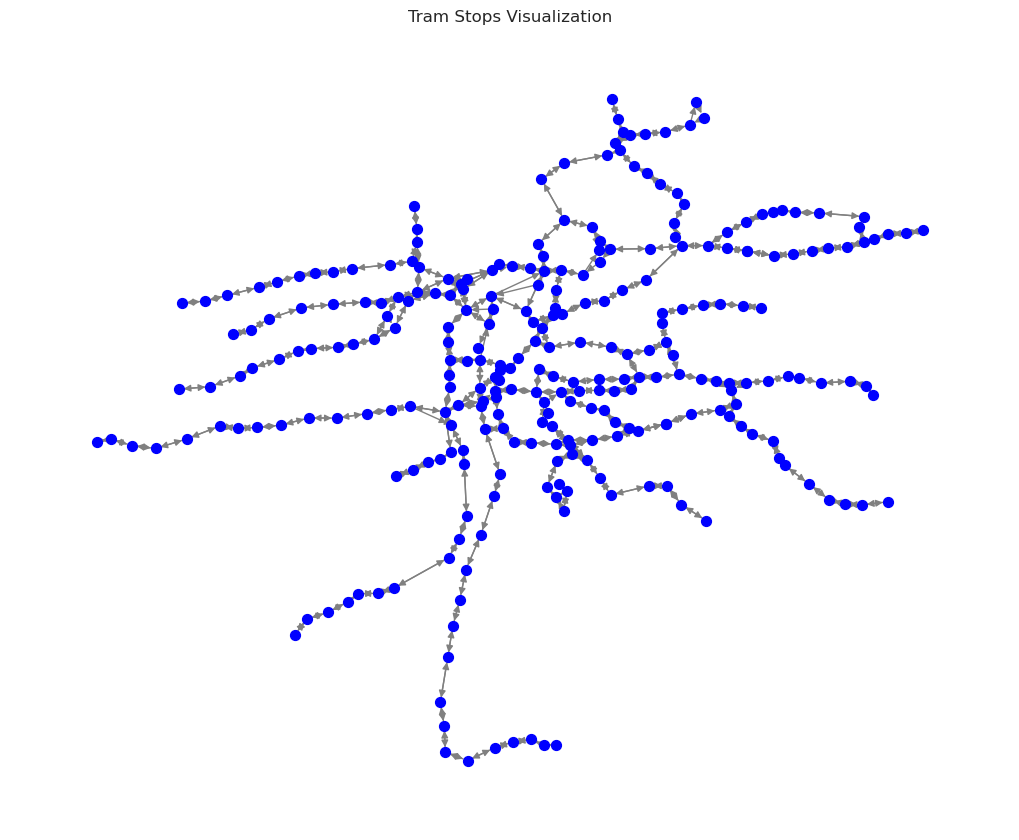

In [68]:
# plot the graph
plt.figure(figsize=(10, 8))
nx.draw(tram_graph, pos=tram_positions, node_size=50, node_color='blue', edge_color='gray')
plt.title('Tram Stops Visualization')
plt.show()

> The current visualisation of the tram stop graph is not optimal:
> 1. All stops are represented by uniform blue dots without labels, which makes it difficult to identify them.
> 2. The lack of geographical context makes it impossible to understand their actual location in the city.
> 3. The intersecting lines between dots create visual noise, reducing the readability of the map.

I'll try to fix it

In [69]:
import folium

# mostly from https://python-visualization.github.io/folium/latest/getting_started.html
#----------------------------------------------------------------------------------------------
# "CartoDB positron" style - the map will hold less detail, which will help highlight my data.
map_prague = folium.Map(location=[50.0755, 14.4378], tiles='CartoDB positron', zoom_start=13)

In [70]:
# HTML code for the legend
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 45px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     text-align: center;
     ">
     &nbsp; Tram network in the city of Prague <br>
     </div>
     '''

# add legend
map_prague.get_root().html.add_child(folium.Element(legend_html))

In [71]:
# I marked the stops with circles
for stop_name, pos in tram_positions.items():
    folium.CircleMarker(
        location=[pos[1], pos[0]],
        radius=6,
        popup=folium.Popup(stop_name, parse_html=True),
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6  # opacity level
    ).add_to(map_prague)

In [72]:
# connecting the stops with lines
for u, v, data in tram_graph.edges(data=True):
    if u in tram_positions and v in tram_positions:
        folium.PolyLine(
            locations=[ [tram_positions[u][1], tram_positions[u][0]], [tram_positions[v][1], tram_positions[v][0]] ],
            color='red',
            weight=1.5,
            opacity=0.8
        ).add_to(map_prague)

In [73]:
# save results
map_prague.save('map_prague.html')
#----------------------------------------------------------------------------------------------

In [74]:
from IPython.display import IFrame

# path
html_file = 'map_prague.html'

# show result in Jupyter Notebook
IFrame(html_file, width=1200, height=800)


> On the positive side, the visualization now includes a geographical context, enhancing user understanding of the tram stop locations throughout the city. The interactivity of the map, with features such as zooming and the display of stop names upon clicking, significantly improves the user experience. However, there are several aspects that could be improved, such as differentiating the routes for a better grasp of the network structure. Overall, the current visualization provides a comprehensive overview of the tram network in Prague and the destinations accessible via tram.

## Measures of centrality

In [75]:
def analyse_and_print_centrality(centrality_dict):
    # Sort the dictionary by centrality values
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    
    # Get the stops with maximum, minimum and average centrality
    top_centrality_stops = sorted_centrality[:3]
    bottom_centrality_stops = [stop for stop in sorted_centrality][-3:]
    middle_index = len(sorted_centrality) // 2
    middle_centrality_stops = sorted_centrality[middle_index-1:middle_index+2]
    
    # Output the results of the analysis
    print("Top 3 Stops:")
    for stop, value in top_centrality_stops:
        print(f"Stop: {stop}, Centrality: {value:.4f}")
    
    print("Middle 3 Stops:")
    for stop, value in middle_centrality_stops:
        print(f"Stop: {stop}, Centrality: {value:.4f}")

    print("Lowest 3 Stops:")
    for stop, value in bottom_centrality_stops:
        print(f"Stop: {stop}, Centrality: {value:.4f}")

### Degree centrality

The degree centrality reflects how many connections each stop has. A high degree of centrality means that many routes pass through the stop and it can be an important hub for transferring or picking up passengers.

In [76]:
weighted_degree = {}

for node in tram_graph.nodes():
    
    degree = 0
    
    for neighbor in tram_graph.neighbors(node):
        weight = tram_graph[node][neighbor]['weight']
        degree += weight
        
    weighted_degree[node] = degree

>In this code we go through all vertices of the graph and for each vertex we sum up the weights of all edges incident to it. This allows to take the weights of edges(the intensity of traffic between stops) into account when calculating the degree of a vertex. This will change the centrality values and may make them more informative given our context.

In [77]:
# find max weight
max_weight = max(data['weight'] for u, v, data in tram_graph.edges(data=True))

In [78]:
normalized_degree_centrality = {}

for node, weighted_degree_value in weighted_degree.items():
    # normalise the value by dividing it by the maximum value of the edge weight
    normalized_degree = weighted_degree_value / max_weight
    normalized_degree_centrality[node] = normalized_degree

# Now we have a dictionary of normalised_degree_centrality with normalised vertex centrality values

> I chose to normalize the values to ensure that the centrality values are scaled appropriately and fall within the [0, 1] range. This normalization allows for a better comparison of centrality values

In [79]:
analyse_and_print_centrality(normalized_degree_centrality)

Top 3 Stops:
Stop: Karlovo náměstí, Centrality: 2.6732
Stop: Anděl, Centrality: 2.4520
Stop: Národní divadlo, Centrality: 2.3059
Middle 3 Stops:
Stop: Nad Džbánem, Centrality: 0.7696
Stop: Červený Vrch, Centrality: 0.7696
Stop: Kobylisy, Centrality: 0.7684
Lowest 3 Stops:
Stop: Pankrác, Centrality: 0.1072
Stop: Špejchar, Centrality: 0.0976
Stop: Zvonařka, Centrality: 0.0056


> High degree of centrality:
The "Karlovo náměstí", "Anděl" and "Národní divadlo" stops have the highest degree of centrality from the list presented, indicating that they have the highest number of connections to other stops. This makes them key transport hubs, likely to have high passenger flows and important for the overall connectivity of the network. They may need additional resources to ensure efficiency and comfort.
>
> Moderate degree of centrality:
The "Nad Džbánem", "Červený Vrch", "Kobylisy" stops also stand out with a moderately high degree of centrality, which may indicate that they serve as important transfer points and have significant passenger numbers, especially during peak hours.
>
> Low degree of centrality:
In contrast, stops such as "Pankrác" and "Špejchar" have a low degree of centrality, which may indicate that they are less important in the overall network structure or that they serve more localised routes.

> Centrality values greater than 1 may indicate that some vertices are highly prominent in the network and have a large impact on tram movements. This may be the result of high concentration of traffic flows or route features.

### Betweenness centrality

Betweenness centrality is a measure that shows how often a node (in our case a stop) appears on the shortest path between pairs of other nodes in the network. In other words, it is a measure of how important a stop is to the passage of passenger flow through the network.

In [80]:
betweenness_centrality = nx.betweenness_centrality(tram_graph, weight='weight')

In [81]:
analyse_and_print_centrality(betweenness_centrality)

Top 3 Stops:
Stop: Malostranská, Centrality: 0.4599
Stop: Jiráskovo náměstí, Centrality: 0.3704
Stop: Národní divadlo, Centrality: 0.3501
Middle 3 Stops:
Stop: Sídliště Červený Vrch, Centrality: 0.0351
Stop: Břevnovský klášter, Centrality: 0.0351
Stop: Zahradní Město, Centrality: 0.0351
Lowest 3 Stops:
Stop: Levského, Centrality: 0.0000
Stop: Nádraží Podbaba, Centrality: 0.0000
Stop: Ústřední dílny DP, Centrality: 0.0000


> High betweenness centrality:
The stops "Malostranská", "Jiráskovo náměstí" and "Národní divadlo" have the highest betweenness centrality values. This indicates that they are often used as transit points between different parts of the city and are key interchange hubs in Prague's tram network. They play an important role in the connectivity of the network and any problems at these stops can have a strong impact on the efficiency of the entire transport system.
>
> Moderate betweenness centrality:
The "Sídliště Červený Vrch", "Břevnovský klášter", "Zahradní Město" stops have moderate betweenness centrality values, indicating their importance in managing passenger flow, although they are not as critical as the most central nodes.
>
> Low or no betweenness centrality:
Some stops such as Levského and Nádraží Podbaba(they are at the end/beginning of the route) have zero betweenness centrality, which may mean that they are less frequently used as transfer points or important points on routes between different parts of the city.

### Closeness centrality

Closeness centrality is a measure used in network analysis to determine the relative importance or centrality of a node within the network. In our context stops with high closeness centrality are those from which passengers can reach all other stops in the network most directly and quickly.

In [82]:
# update edges by representing weights as distances and normalise them
for u, v, data in tram_graph.edges(data=True):
    data['distance'] = max_weight / data['weight']

> This normalization process for closeness centrality is aimed at transforming edge weights into distances while ensuring that larger edge weights correspond to shorter distances. The maximum weight among all edges (max_weight) serves as a reference point for defining distances.

In [83]:
closeness_centrality = nx.closeness_centrality(tram_graph, distance='distance')

In [84]:
analyse_and_print_centrality(closeness_centrality)

Top 3 Stops:
Stop: Karlovo náměstí, Centrality: 0.0363
Stop: Štěpánská, Centrality: 0.0354
Stop: Lazarská, Centrality: 0.0353
Middle 3 Stops:
Stop: Přístaviště, Centrality: 0.0240
Stop: Hotel Golf, Centrality: 0.0240
Stop: Vozovna Strašnice, Centrality: 0.0240
Lowest 3 Stops:
Stop: Třebenická, Centrality: 0.0106
Stop: Zvonařka, Centrality: 0.0048
Stop: Levského, Centrality: 0.0000


> "Karlovo náměstí", "Štěpánská" "Lazarská": these are the stops with the highest closeness centrality, indicating their central position in the transport network. It allows passengers to quickly reach most other stops in the network, making it critical for the efficient movement of people around the city.
>
> The stops "Přístaviště", "Hotel Golf" and "Vozovna Strašnice" have an average closeness centrality value. This means that they provide a moderate number of direct connections to other stops and their role in the network is important, but not as critical as stops with higher centrality.
>
> "Třebenická", "Zvonařka", "Levského"  These stops have one of the lowest proximity centrality values, which may indicate its peripheral position in the network and/or that more transfers are required to reach other stops. It may be worth considering the potential need for improved connectivity to the rest of the city.

### Visualisation of degree centrality

In [85]:
from branca.colormap import linear

In [86]:
# min & max centrality
min_centrality = min(normalized_degree_centrality.values())
max_centrality = max(normalized_degree_centrality.values())

In [87]:
map_prague2 = folium.Map(location=[50.0755, 14.4378], tiles='CartoDB positron', zoom_start=13)

In [88]:
# create color scale
color_scale = linear.Reds_09.scale(min_centrality, max_centrality).to_step(10)
color_scale.caption = 'Degree Centrality of Tram Stops'

color_scale.add_to(map_prague2)

In [89]:
# a function to apply color scale
def get_color(centrality):
    return color_scale(centrality)

In [90]:
# the map
map_prague2 = folium.Map(location=[50.0755, 14.4378], tiles='CartoDB positron', zoom_start=13)

In [91]:
# I marked the stops with circles
for stop_name, pos in tram_positions.items():
    tooltip_content = f"{stop_name}: {normalized_degree_centrality.get(stop_name, 'N/A'):.3e}"

    folium.CircleMarker(
        location=tram_positions[stop_name][::-1],
            radius=6,
            color=get_color(normalized_degree_centrality.get(stop_name, 0)),
            fill=True,
            tooltip=tooltip_content,
            fill_color=get_color(normalized_degree_centrality.get(stop_name, 0)),
            fill_opacity=0.7
        ).add_to(map_prague2)

In [92]:
# connecting the stops with lines
for u, v, data in tram_graph.edges(data=True):
    if u in tram_positions and v in tram_positions:
        folium.PolyLine(
            locations=[ [tram_positions[u][1], tram_positions[u][0]], [tram_positions[v][1], tram_positions[v][0]] ],
            color='gray',
            weight=1.5,
            opacity=0.8
        ).add_to(map_prague2)

In [93]:
# HTML code for the legend
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 300px; height: 45px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     text-align: center;
     ">
     &nbsp; The degree centrality visualisation for tram network in the city of Prague <br>
     </div>
     '''

# add legend
map_prague2.get_root().html.add_child(folium.Element(legend_html))

In [94]:
# save the map to an HTML file
map_prague2.save('map_prague2.html')

In [95]:
# path
html_file = 'map_prague2.html'

# show result in Jupyter Notebook
IFrame(html_file, width=1100, height=800)

> The visualization of degree centrality on the tram network map has both advantages and drawbacks. On the positive side, the color scale accurately reflects the centrality values, providing an immediate visual understanding of the most and least central stops. The interactivity, allowing viewers to hover over stops to get names and centrality values, keeps the map uncluttered. However, the complexity of the network with many overlapping routes and stops can make the map appear congested and may overwhelm the viewer.
> But I believe it's enough for our basic purposes.

# My questions

## How does night affect transit time between stops?


In [96]:
# top 3 betweenness centrality stops
top_stops = ["Malostranská", "Národní divadlo", "Jiráskovo náměstí"]

# include only rides passing through the top 3 stops
df_top_stops = my_data[(my_data['stop_from_name'].isin(top_stops)) | (my_data['stop_to_name'].isin(top_stops))]

In [97]:
def calculate_ride_duration(departure_time, arrival_time):

    '''calculates ride duration '''
    departure_seconds = time_to_seconds(departure_time)
    arrival_seconds = time_to_seconds(arrival_time)
    
    # if the arrival time is less than the departure time, add 24 hours (86400 seconds)
    if arrival_seconds < departure_seconds:
        arrival_seconds += 86400
    
    duration_seconds = arrival_seconds - departure_seconds
    return duration_seconds


def time_to_seconds(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds


In [98]:
# calculate duration
df_top_stops.loc[:, 'duration'] = df_top_stops.apply(lambda row: calculate_ride_duration(row['depart_from'], row['arrive_to']), axis=1)

# combine rides starting and ending at each of the stops
df_top_stops.loc[:,'stop'] = df_top_stops.apply(lambda row: row['stop_from_name'] if row['stop_from_name'] in top_stops else row['stop_to_name'], axis=1)

# grouping data by stop name and night/day and calculating average time
average_duration = df_top_stops.groupby(['stop', 'is_night'])['duration'].mean().unstack()

# chose only our 3 stops
average_duration = average_duration.loc[top_stops]

/tmp/ipykernel_27795/500583926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_stops.loc[:, 'duration'] = df_top_stops.apply(lambda row: calculate_ride_duration(row['depart_from'], row['arrive_to']), axis=1)
/tmp/ipykernel_27795/500583926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_stops.loc[:,'stop'] = df_top_stops.apply(lambda row: row['stop_from_name'] if row['stop_from_name'] in top_stops else row['stop_to_name'], axis=1)


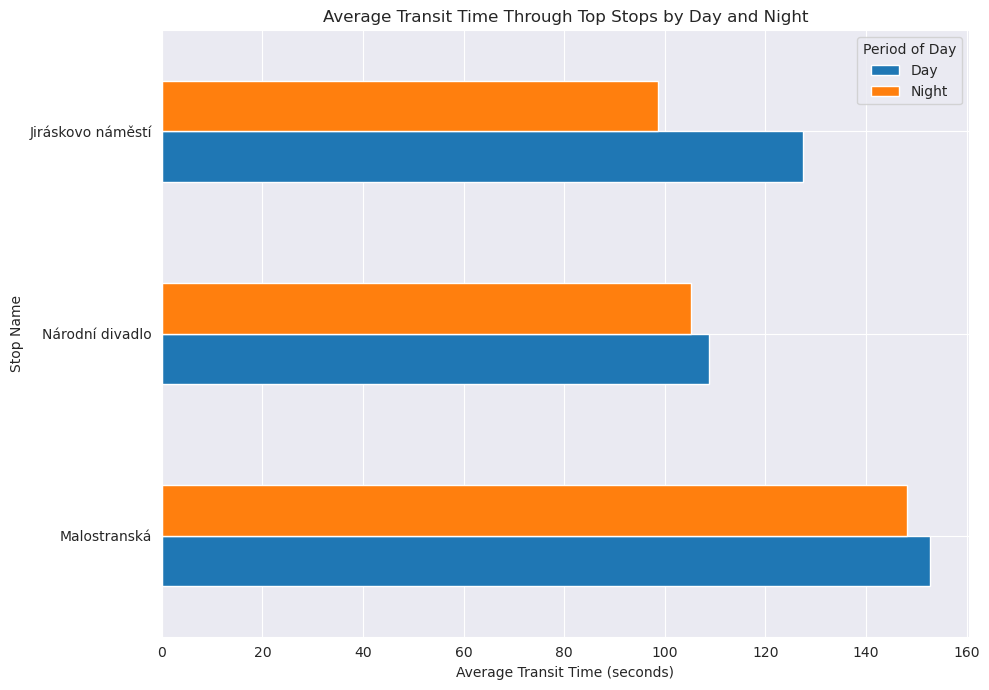

In [126]:
# visualisation
average_duration.plot(kind='barh', figsize=(10, 7), title='Average Transit Time Through Top Stops by Day and Night')

plt.ylabel('Stop Name')
plt.xlabel('Average Transit Time (seconds)')
plt.legend(['Day', 'Night'], title='Period of Day')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

> The visual representation illustrates the average transit time through the top three tram stops based on their betweenness centrality. The selection of these stations is strategic; they are pivotal to the network due to their high betweenness centrality scores, meaning they are key connectors within the tram system and likely experience high passenger throughput. The data suggest that during the day, these stops have a higher average transit time, which may be due to increased traffic and passenger boarding times. At night, the transit time decreases, possibly reflecting less congestion and quicker boarding processes.

## Which days of the week have the highest number of records in the dataset, and how different in number are they compared to the other days of the week?

In [100]:
# select columns for days of the week
days_of_week_columns = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

# calculate the sum of values for each day of the week
day_of_week_sums = my_data[days_of_week_columns].sum()

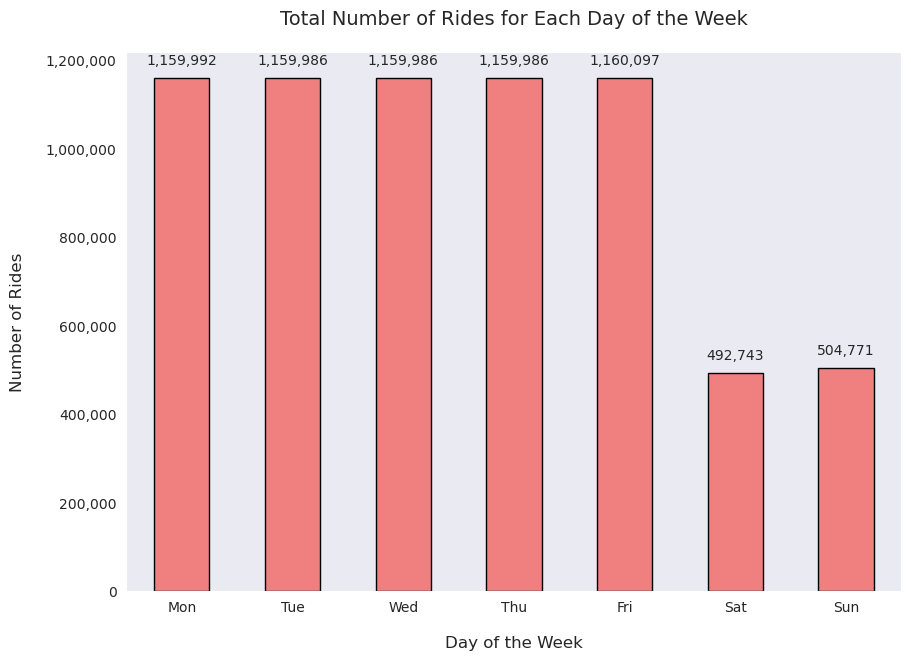

The highest total rides (1160097) are observed on friday.


In [124]:
# Create a bar chart 
plt.figure(figsize=(10, 7))

# Use a clearer color and add edge color for better bar definition
day_of_week_sums.plot(kind='bar', color='lightcoral', edgecolor='black')

# More descriptive axis labels
plt.xlabel('Day of the Week', labelpad=15, fontsize=12)
plt.ylabel('Number of Rides', labelpad=15, fontsize=12)

plt.title('Total Number of Rides for Each Day of the Week', pad=20, fontsize=14)

# Improved labels with thousands separator, and a slight adjustment in the vertical position for better readability
for index, value in enumerate(day_of_week_sums):
    plt.text(index, value + 0.02 * max(day_of_week_sums), f"{value:,}", ha='center', va='bottom')

# Customizing the ticks for better readability
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.yticks(np.arange(0, max(day_of_week_sums) + 100000, 200000), [f"{x:,.0f}" for x in np.arange(0, max(day_of_week_sums) + 100000, 200000)])

plt.grid(False)
plt.show()

# Find the day of the week with the highest total rides
most_active_day = day_of_week_sums.idxmax()
most_active_count = day_of_week_sums.max()

print(f"The highest total rides ({most_active_count}) are observed on {most_active_day}.")


> The data show that on weekdays it has almost the same number of rides(all days with totals around 1.16 million) with a slight increase on Friday, which can be disregarded. These figures are more than double the numbers seen on Saturday and Sunday, which have about 492,000 and 504,000 rides respectively. So, the workweek seem to be the busiest for rides, while the weekend has significantly fewer rides, which was pretty much expected.
> 
> I've noticed it myself when I go to the shops at the weekend, if you get to the bus stop at a bad time, you have to wait about 20 minutes for the bus

## How does the intensity of stop usage on tram routes change during peak hours compared to off-peak hours?

In [102]:
# extract the hour
my_data['hour'] = pd.to_datetime(my_data['depart_from'], format='%H:%M:%S', errors='coerce').dt.hour

In [103]:
# group the data by departure hour and count the number of journeys
trip_counts_by_hour = my_data.groupby('hour').size().reset_index(name='trip_count')

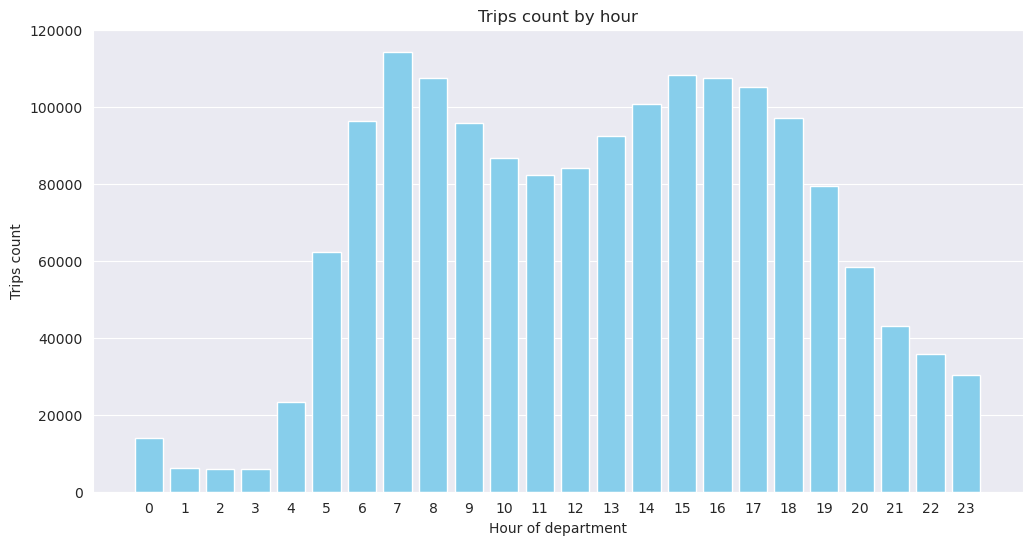

In [116]:
# let's draw a bar chart
plt.figure(figsize=(12, 6))
plt.bar(trip_counts_by_hour['hour'], trip_counts_by_hour['trip_count'], color='skyblue')
plt.title('Trips count by hour')
plt.xlabel('Hour of department')
plt.ylabel('Trips count')
plt.xticks(range(0, 24))  # Set the marks from 0 to 23 for each hour
plt.grid(axis='x')
plt.show()

> From the bar chart provided, it can be concluded that the number of trips varies depending on the hour of the day. There are peak periods during the day when the number of trips increases, which usually corresponds to the morning and evening rush hours to and from work. There is a decrease in activity in the later evening hours and the least number of trips occur during the night hours, which is consistent with the expected daily rhythm of city life. This can be useful for planning the timetables and resources of the transport system to meet demand at different times of the day. Which is exactly what PID does.

# P.S.

Sources used:
1. https://python-visualization.github.io/folium/latest/getting_started.html - folium lib docs
2. Chat GPT - I did the graphics and the rest of it myself this time, looking at my previous assignment. But for example, when I learnt about folium library and tried it, I didn't like that my data was lost in the map with many details. It's hard to navigate in the documentation, so I just asked the gpt chat and he immediately told me how to fix it. And there were a few other little moments like that. 

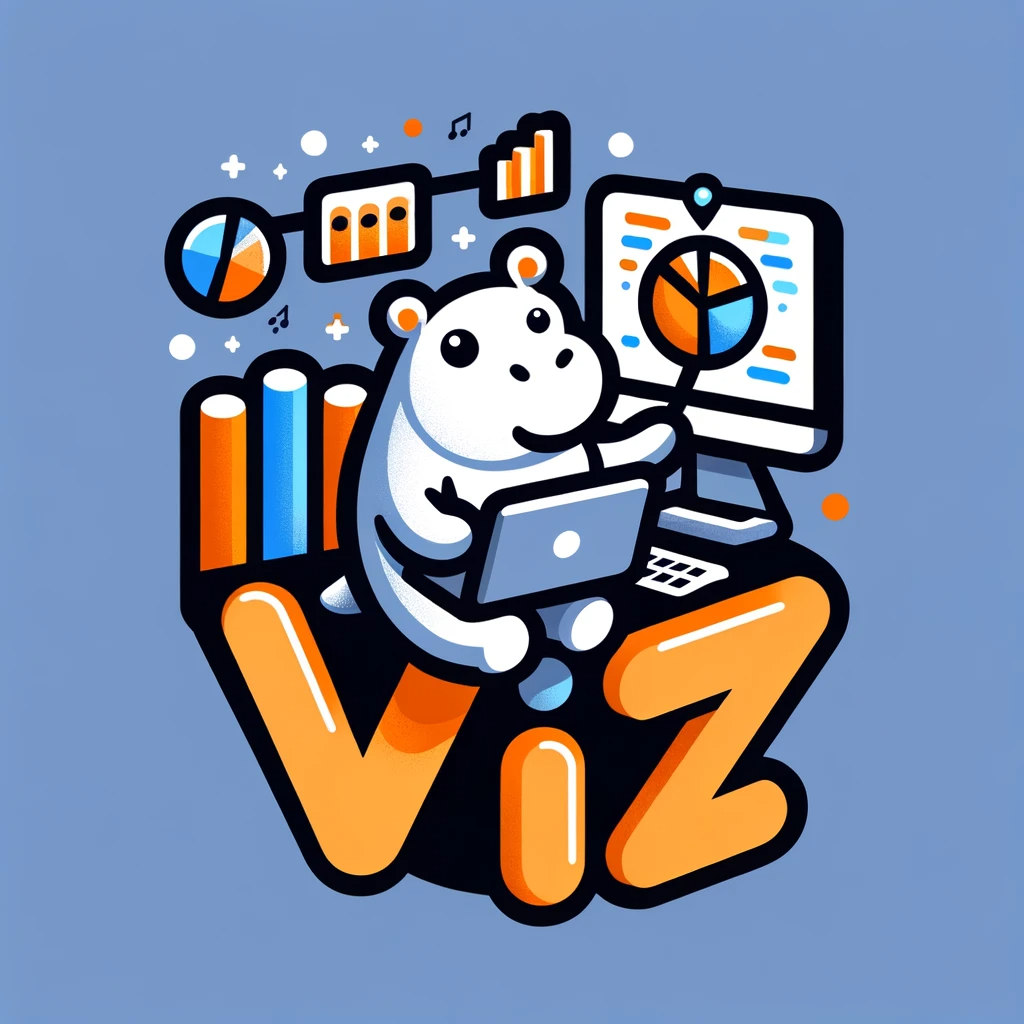

In [75]:
from IPython.display import Image

image_path = 'bonus.png' # generated by Chat GPT - DALL E
Image(filename=image_path, width=400, height=400)


Děkuji za úkol